#### The birthday problem formula

In [1]:
import numpy as  np
import matplotlib.pylab as plt

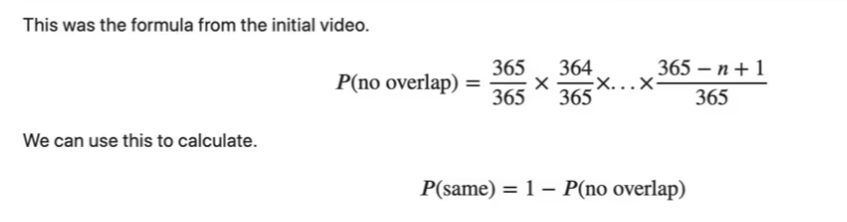

In [2]:
room = 20

np.prod((365 - np.arange(20))/365)


0.5885616164194197

In [3]:
1 - np.prod((365 - np.arange(20))/365)

0.41143838358058027

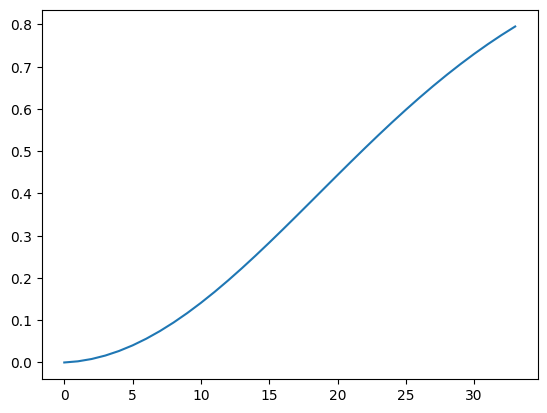

In [4]:
def calculate(room=20):
    return 1 - np.prod((365 - np.arange(room))/365)

plt.plot([calculate(r) for r in range(1, 35)]);

In [5]:
room = 20
np.mean([np.unique(np.random.randint(1, 365, room)).shape[0] == room for i in range(1000)])

0.572

In [6]:
def simulate(room=20, n_sim=1000):
    hit = 0
    for i in range(n_sim):
        n_bday = np.unique(np.random.randint(1, 365, room)).shape[0] 
        hit += n_bday == room
    return 1 - hit/n_sim

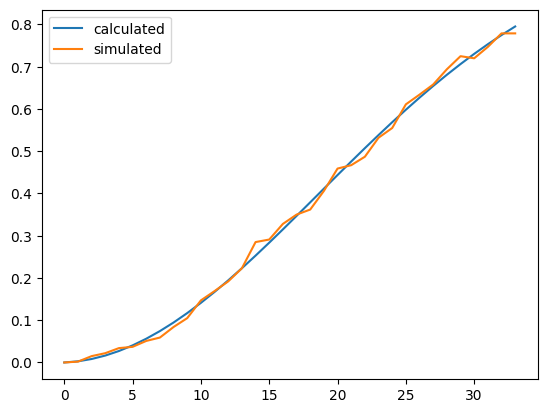

In [7]:
plt.plot([calculate(r) for r in range(1, 35)], label="calculated")
plt.plot([simulate(r) for r in range(1, 35)], label="simulated")
plt.legend();

### Dataset

In [8]:
!wget https://calmcode.io/static/data/birthdays.csv

--2024-06-14 10:33:38--  https://calmcode.io/static/data/birthdays.csv
Resolving calmcode.io (calmcode.io)... 162.159.140.98, 172.66.0.96, 2606:4700:7::60, ...
Connecting to calmcode.io (calmcode.io)|162.159.140.98|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11922717 (11M) [application/octet-stream]
Saving to: ‘birthdays.csv.1’

birthdays.csv.1     100%[===================>]  11.37M  56.6MB/s    in 0.2s    

2024-06-14 10:33:39 (56.6 MB/s) - ‘birthdays.csv.1’ saved [11922717/11922717]



In [9]:
import pandas as pd
import matplotlib.pylab as plt

df = pd.read_csv("birthdays.csv")

df.head()

,state,year,month,day,date,wday,births
0,AK,1969,1,1,1969-01-01,Wed,14
1,AL,1969,1,1,1969-01-01,Wed,174
2,AR,1969,1,1,1969-01-01,Wed,78
3,AZ,1969,1,1,1969-01-01,Wed,84
4,CA,1969,1,1,1969-01-01,Wed,824


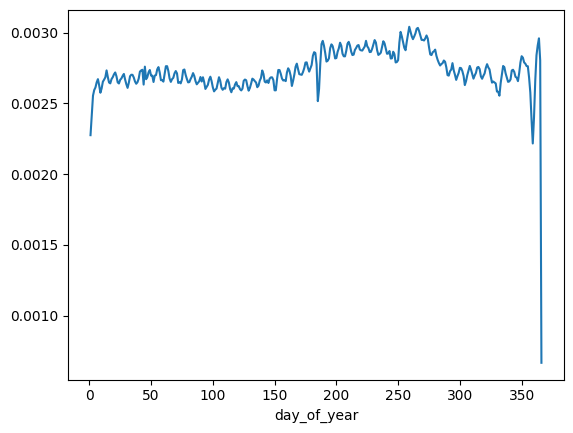

In [10]:

plot_df = (df
  .assign(date = lambda d: pd.to_datetime(d['date']))
  .assign(day_of_year = lambda d: d['date'].dt.dayofyear)
  .groupby('day_of_year')
  .agg(n_births=('births', 'sum'))
  .assign(p = lambda d: d['n_births']/d['n_births'].sum()))

probabilities = plot_df['p']
probabilities.plot();

In [11]:
(df
  .assign(date = lambda d: pd.to_datetime(d['date']))
)

,state,year,month,day,date,wday,births
0,AK,1969,1,1,1969-01-01,Wed,14
1,AL,1969,1,1,1969-01-01,Wed,174
2,AR,1969,1,1,1969-01-01,Wed,78
3,AZ,1969,1,1,1969-01-01,Wed,84
4,CA,1969,1,1,1969-01-01,Wed,824
...,...,...,...,...,...,...,...
372550,VT,1988,12,31,1988-12-31,Sat,21
372551,WA,1988,12,31,1988-12-31,Sat,157
372552,WI,1988,12,31,1988-12-31,Sat,167
372553,WV,1988,12,31,1988-12-31,Sat,45


In [12]:
(df
  .assign(date = lambda d: pd.to_datetime(d['date']))
  .assign(day_of_year = lambda d: d['date'].dt.dayofyear)
)

,state,year,month,day,date,wday,births,day_of_year
0,AK,1969,1,1,1969-01-01,Wed,14,1
1,AL,1969,1,1,1969-01-01,Wed,174,1
2,AR,1969,1,1,1969-01-01,Wed,78,1
3,AZ,1969,1,1,1969-01-01,Wed,84,1
4,CA,1969,1,1,1969-01-01,Wed,824,1
...,...,...,...,...,...,...,...,...
372550,VT,1988,12,31,1988-12-31,Sat,21,366
372551,WA,1988,12,31,1988-12-31,Sat,157,366
372552,WI,1988,12,31,1988-12-31,Sat,167,366
372553,WV,1988,12,31,1988-12-31,Sat,45,366


In [13]:
(df
  .assign(date = lambda d: pd.to_datetime(d['date']))
  .assign(day_of_year = lambda d: d['date'].dt.dayofyear)
  .groupby('day_of_year')
)

In [14]:
(df
  .assign(date = lambda d: pd.to_datetime(d['date']))
  .assign(day_of_year = lambda d: d['date'].dt.dayofyear)
  .groupby('day_of_year')
  .agg(n_births=('births', 'sum'))
 )

,n_births
day_of_year,
1,160369
2,169896
3,180036
4,182854
5,184145
...,...
362,200176
363,205119
364,208613


In [15]:
(df
  .assign(date = lambda d: pd.to_datetime(d['date']))
  .assign(day_of_year = lambda d: d['date'].dt.dayofyear)
  .groupby('day_of_year')
  .agg(n_births=('births', 'sum'))
  .assign(p = lambda d: d['n_births']/d['n_births'].sum()))

,n_births,p
day_of_year,,
1,160369,0.002275
2,169896,0.002410
3,180036,0.002554
4,182854,0.002594
5,184145,0.002612
...,...,...
362,200176,0.002840
363,205119,0.002910
364,208613,0.002960


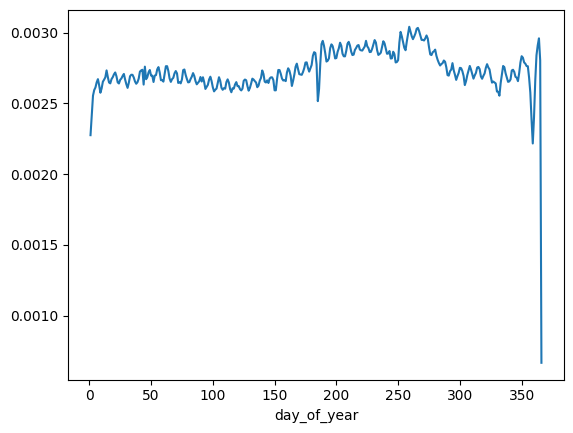

In [16]:
plot_df = (df
  .assign(date = lambda d: pd.to_datetime(d['date']))
  .assign(day_of_year = lambda d: d['date'].dt.dayofyear)
  .groupby('day_of_year')
  .agg(n_births=('births', 'sum'))
  .assign(p = lambda d: d['n_births']/d['n_births'].sum()))

probabilities = plot_df['p']
probabilities.plot();

### True Simulation

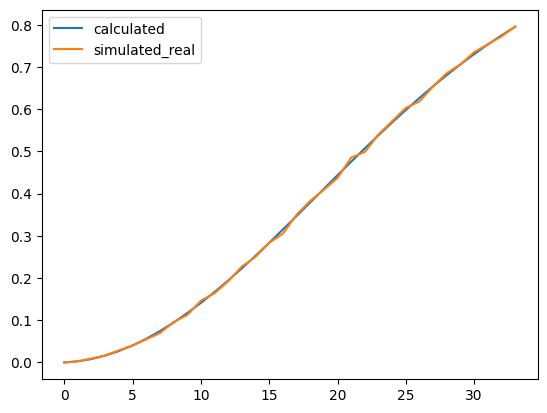

In [17]:
plot_df = (df
  .assign(date = lambda d: pd.to_datetime(d['date']))
  .assign(day_of_year = lambda d: d['date'].dt.dayofyear)
  .groupby('day_of_year')
  .agg(n_births=('births', 'sum'))
  .assign(p = lambda d: d['n_births']/d['n_births'].sum()))

def sim_real_once(room = 20):
    r = np.random.choice(probabilities.index, p=probabilities, size=room)
    return np.unique(r).shape[0] != room

def simulate_real(room = 20, n_sim = 1000):
    return np.mean([sim_real_once(room) for _ in range(n_sim)])

plt.plot([calculate(r) for r in range(1, 35)], label="calculated")
plt.plot([simulate_real(room = i, n_sim=10_000) for i in range(1, 35)], label="simulated_real")
plt.legend();

In [20]:
room = 20

def sim_real_once(room=20):
    r = np.random.choice(probabilities.index, p=probabilities, size=room)
    return np.unique(r).shape[0] != room

def simulate_real(room=20, n_sim=1000):
    return np.mean([sim_real_once(room) for _ in range(n_sim)])


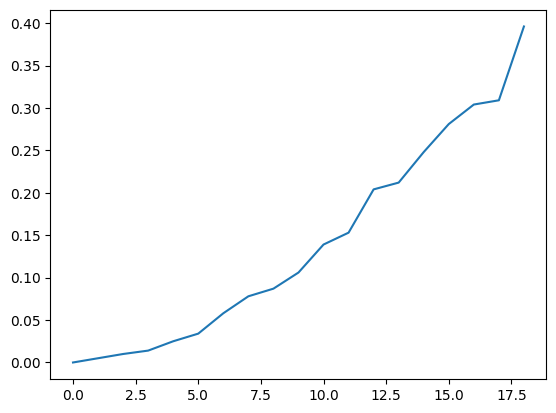

In [21]:
plt.plot([simulate_real(i) for i in range(1, 20)]);

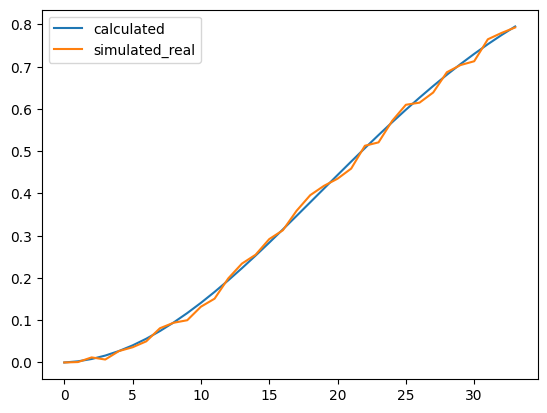

In [22]:
plt.plot([calculate(r) for r in range(1, 35)], label="calculated")
plt.plot([simulate_real(room = i) for i in range(1, 35)], label="simulated_real")
plt.legend();

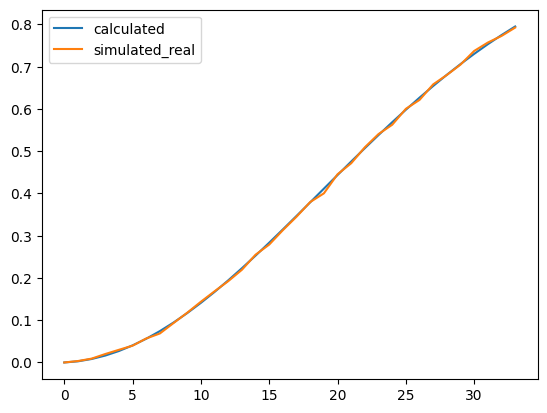

In [23]:
plt.plot([calculate(r) for r in range(1, 35)], label="calculated")
plt.plot([simulate_real(room = i, n_sim=10_000) for i in range(1, 35)], label="simulated_real")
plt.legend();

### Conclusion

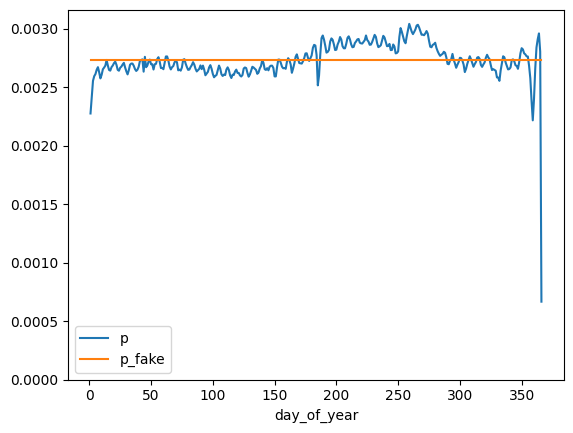

In [24]:
plot_df = (df
  .assign(date = lambda d: pd.to_datetime(d['date']))
  .assign(day_of_year = lambda d: d['date'].dt.dayofyear)
  .groupby('day_of_year')
  .agg(n_births=('births', 'sum'))
  .assign(p = lambda d: d['n_births']/d['n_births'].sum()))

plot_df.assign(p_fake = lambda d: 1/d.shape[0])[['p', 'p_fake']].plot()
plt.ylim(0);

### Entropy: Degree of randomness for both blue and orange lines

In [25]:
true_p = plot_df['p']
fake_p = plot_df.assign(p_fake = lambda d: 1/d.shape[0])['p_fake']

np.sum(true_p * np.log(true_p)), np.sum(fake_p * np.log(fake_p))


(-5.900547300511186, -5.902633333401367)